In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=b1fe0c66c33d4703e5bbf0d9e4821bfb7c5294a112e51b54ccfcb96ede0a1eee
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Load the data
file_path = 'RFMT.csv'
data = pd.read_csv(file_path)



# Select R, F, M columns for clustering
rfm_data = data[['R_Score', 'F_Score', 'M_Score']]

In [ ]:
# Load the clustered data
file_path_new = 'customer_stat_cleaned.csv'
customer_stat_cleaned = pd.read_csv(file_path_new)
# compute correlation matrix
correlation_matrix = customer_stat_cleaned[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending', 'Tenure']].corr()

correlation_matrix

,Transaction_Count,Days_Since_Last_Transaction,Average_Spending,Tenure
Transaction_Count,1.000000,-0.206159,-0.007630,0.012288
Days_Since_Last_Transaction,-0.206159,1.000000,-0.213254,0.027297
Average_Spending,-0.007630,-0.213254,1.000000,0.023176
Tenure,0.012288,0.027297,0.023176,1.000000


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

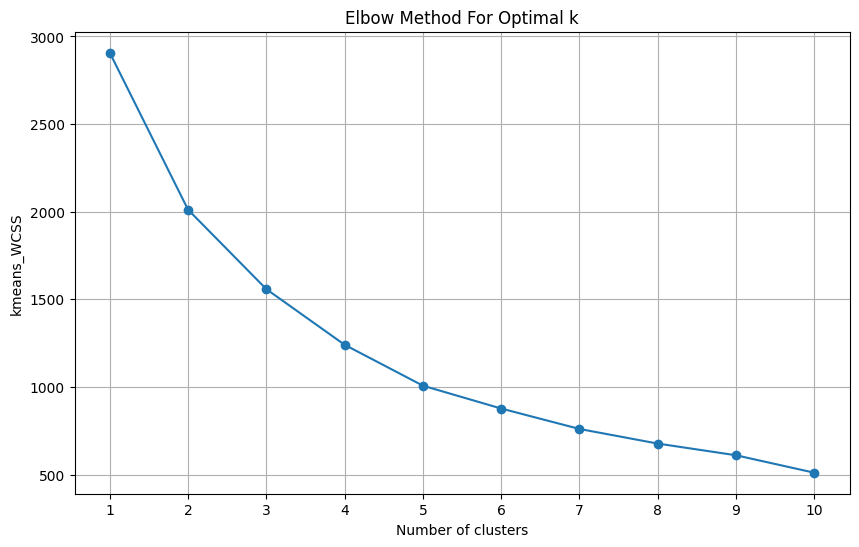

In [ ]:
# Calculate the within-cluster sum of square (wcss) for
# different number of clusters
kmeans_wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_data)
    kmeans_wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), kmeans_wcss, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('kmeans_WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Apply K-means clustering with k = 4
kmeans = KMeans(init="random",
                n_clusters=4,
                n_init=10,
                max_iter=300,
                random_state=42)
kmeans_clusters = kmeans.fit_predict(rfm_data)




In [ ]:

# Merge the datasets based on CustomerID
merged_data = pd.merge(data, customer_stat_cleaned, on='CustomerID')

# Add the cluster labels to the original data
merged_data['kmeans_Cluster'] = kmeans_clusters

# Calculate centroids for each cluster
kmeans_centroids = merged_data.groupby('kmeans_Cluster')[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending']].mean()


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:252: UserWarning: n_clusters should be larger than 2 if max_iter != 0 setting max_iter to 0.
  warnings.warn(


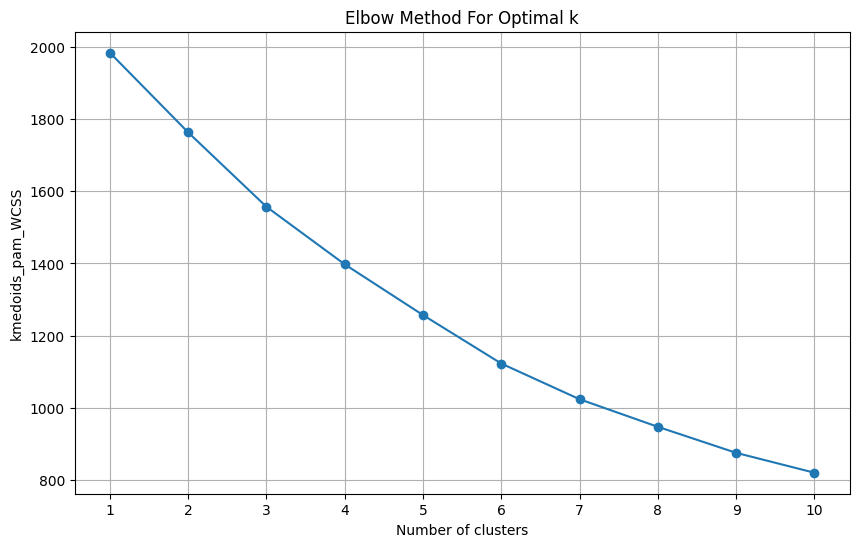

In [ ]:
# kmedoids elbow plot
kmedoids_pam_wcss = []
for i in range(1, 11):
    kmedoids_pam = KMedoids(n_clusters=i, method='pam',random_state=42)
    kmedoids_pam.fit(rfm_data)
    kmedoids_pam_wcss.append(kmedoids_pam.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), kmedoids_pam_wcss, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('kmedoids_pam_WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [ ]:
# Apply K-medoid clustering with k = 4 and compute centroids
kmedoids_pam = KMedoids(n_clusters=4, method='pam', random_state=42)
kmedoids_pam_clusters = kmedoids_pam.fit_predict(rfm_data)
merged_data['kmedoids_pam_Cluster'] = kmedoids_pam_clusters
kmedoids_pam_centroids = merged_data.groupby('kmedoids_pam_Cluster')[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending']].mean()

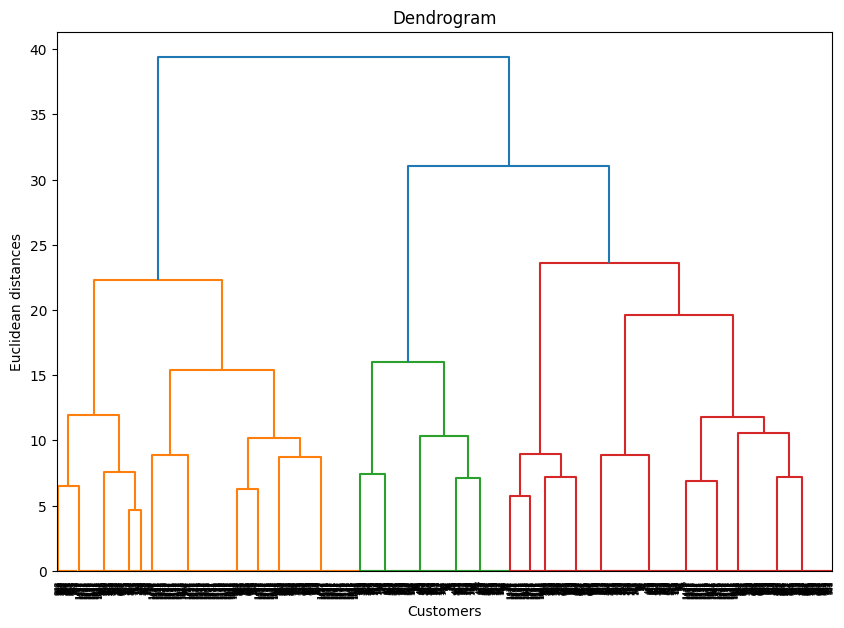

In [ ]:
# Apply HAC
# linkage matrix
Z = linkage(rfm_data, method='ward')

# plot dendogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [ ]:
# HAC bottom to up
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_clusters = agg_clustering.fit_predict(rfm_data)

# add labels to merged data
merged_data['agg_Cluster'] = agg_clusters
agg_centroids = merged_data.groupby('agg_Cluster')[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending']].mean()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# perform Fuzzy C-Means
rfm_data_T = rfm_data.values.T
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    rfm_data_T, 4, 2, error=0.005, maxiter=1000, init=None)

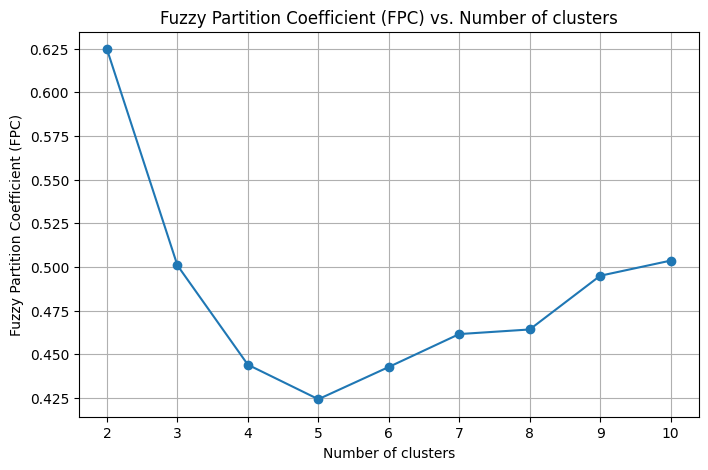

In [ ]:

# A range of the number of fuzzy cluster
cluster_range = range(2, 11)
fpcs = []


for n_clusters in cluster_range:
    # Apply fuzzy c means
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(rfm_data.T, n_clusters, 2, error=0.005, maxiter=1000, init=None)
    fpcs.append(fpc)



# plot FPC figure
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, fpcs, marker='o')
plt.title('Fuzzy Partition Coefficient (FPC) vs. Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.grid(True)
plt.show()

In [ ]:
# Get the cluster label with the maximum membership for each data point
fuzzy_cluster_labels = np.argmax(u, axis=0)

# Add cluster labels to the original data
merged_data['fuzzy_Cluster'] = fuzzy_cluster_labels

# Calculate the centroids of each cluster
fuzzy_centroids = merged_data.groupby('fuzzy_Cluster')[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending']].mean()



In [ ]:
# compute average silhouette score for algorithms
agg_silhouette_avg = silhouette_score(rfm_data, agg_clusters)
print(f'agg_Silhouette Score: {agg_silhouette_avg:.3f}')
kmedoids_pam_silhouette_avg = silhouette_score(rfm_data, kmedoids_pam_clusters)
print(f'kmedoids_pam_Silhouette Score: {kmedoids_pam_silhouette_avg:.3f}')
kmeans_silhouette_avg = silhouette_score(rfm_data, kmeans_clusters)
print(f'kmeans_Silhouette Score: {kmeans_silhouette_avg:.3f}')
fuzzy_silhouette_avg = silhouette_score(rfm_data_T.T, fuzzy_cluster_labels)
print(f'fuzzy_Silhouette Score: {fuzzy_silhouette_avg:.3f}')

agg_Silhouette Score: 0.297
kmedoids_pam_Silhouette Score: 0.303
kmeans_Silhouette Score: 0.331
fuzzy_Silhouette Score: 0.329


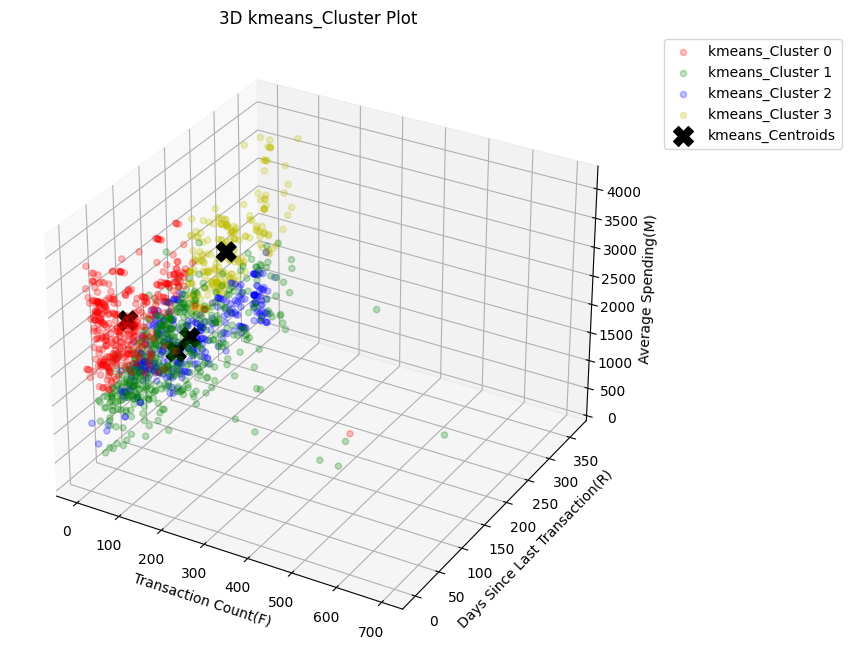

In [ ]:
# K means 3D Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y']

# Plot each cluster with different color
for cluster in range(4):
    kmeans_cluster_data = merged_data[merged_data['kmeans_Cluster'] == cluster]
    ax.scatter(kmeans_cluster_data['Transaction_Count'], kmeans_cluster_data['Days_Since_Last_Transaction'], kmeans_cluster_data['Average_Spending'],
               c=colors[cluster], label=f'kmeans_Cluster {cluster}', alpha=0.25)

# Calculate centroids for each cluster
kmeans_centroids = merged_data.groupby('kmeans_Cluster')[['Transaction_Count', 'Days_Since_Last_Transaction', 'Average_Spending']].mean()

# Plot the cluster centers
ax.scatter(kmeans_centroids['Transaction_Count'], kmeans_centroids['Days_Since_Last_Transaction'], kmeans_centroids['Average_Spending'],
           c='black', marker='X', s=200, alpha=1, label='kmeans_Centroids')

ax.set_xlabel('Transaction Count(F)')
ax.set_ylabel('Days Since Last Transaction(R)')
ax.set_zlabel('Average Spending(M)')

# Adjust the z-axis limit to fully display the range of values
ax.set_zlim(0, merged_data['Average_Spending'].max() + 500)

# Adjust legend position to avoid overlap
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title('3D kmeans_Cluster Plot')
plt.show()

In [ ]:
merged_data.to_csv('RFM_clustered.csv', index=False)

In [ ]:
# K means 3D interactive plot
# Create a 3D scatter plot
fig = px.scatter_3d(merged_data,
                    x='Transaction_Count',
                    y='Days_Since_Last_Transaction',
                    z='Average_Spending',
                    color='kmeans_Cluster',
                    title='3D Cluster Plot Based on Transactions',
                    range_x=[0, 300],
                    opacity=0.25)
# Add centroids to the plot
fig.add_trace(
    go.Scatter3d(
        x=kmeans_centroids['Transaction_Count'],
        y=kmeans_centroids['Days_Since_Last_Transaction'],
        z=kmeans_centroids['Average_Spending'],
        mode='markers',
        marker=dict(size=10, color='black', symbol='x'),
        name='kmeans_Centroids'
    )
)
fig.show()

In [ ]:
# kmedoids 3D scatter plot
# Create a 3D scatter plot
fig = px.scatter_3d(merged_data,
                    x='Transaction_Count',
                    y='Days_Since_Last_Transaction',
                    z='Average_Spending',
                    color='kmedoids_pam_Cluster',
                    title='3D kmedoids_pam_Cluster Plot Based on Transactions',
                    range_x=[0, 300],
                    opacity=0.5)
# Add centroids to the plot
fig.add_trace(
    go.Scatter3d(
        x=kmedoids_pam_centroids['Transaction_Count'],
        y=kmedoids_pam_centroids['Days_Since_Last_Transaction'],
        z=kmedoids_pam_centroids['Average_Spending'],
        mode='markers',
        marker=dict(size=10, color='black', symbol='x'),
        name='kmedoids_pam_Centroids'
    )
)
fig.show()

In [ ]:
# HAC 3D scatter plot

fig = px.scatter_3d(merged_data,
                    x='Transaction_Count',
                    y='Days_Since_Last_Transaction',
                    z='Average_Spending',
                    color='agg_Cluster',
                    title='3D plot based on Transaction Count(HAC)',
                    opacity=0.6)


fig.add_trace(
    go.Scatter3d(
        x=agg_centroids['Transaction_Count'],
        y=agg_centroids['Days_Since_Last_Transaction'],
        z=agg_centroids['Average_Spending'],
        mode='markers',
        marker=dict(size=10, color='black', symbol='x', opacity=0.8),
        name='agg_Centroids'
    )
)

In [ ]:
# Fuzzy C 3D plot
fig = px.scatter_3d(merged_data,
                    x='Transaction_Count',
                    y='Days_Since_Last_Transaction',
                    z='Average_Spending',
                    color='fuzzy_Cluster',
                    title='3D plot based on Transaction (Fuzzy C-Means)',
                    opacity=0.6)


fig.add_trace(
    go.Scatter3d(
        x=fuzzy_centroids['Transaction_Count'],
        y=fuzzy_centroids['Days_Since_Last_Transaction'],
        z=fuzzy_centroids['Average_Spending'],
        mode='markers',
        marker=dict(size=10, color='black', symbol='x', opacity=0.8),
        name='Centroids'
    )
)